In [1]:
# import 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
df = pd.read_csv(r'../Datasets/used_cars_data.csv')
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [14]:
# Extract the 'Kilometers_Driven' column
km_driven = df['Kilometers_Driven']
print(km_driven)

0       72000
1       41000
2       46000
3       87000
4       40670
        ...  
7248    89411
7249    59000
7250    28000
7251    52262
7252    72443
Name: Kilometers_Driven, Length: 7253, dtype: int64


In [15]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [16]:
# Normalize data
km_min_max = min_max_scaler.fit_transform(km_driven.values.reshape(-1, 1)).flatten()
km_standard = standard_scaler.fit_transform(km_driven.values.reshape(-1, 1)).flatten()
print(km_min_max)
print(km_standard)

[0.01105091 0.00628155 0.0070508  ... 0.0042815  0.00801421 0.01111906]
[ 0.15755316 -0.20965014 -0.1504238  ... -0.36363862 -0.07624874
  0.16280061]


In [17]:
# Prepare DataFrame for visualization
normalized_data = pd.DataFrame({
    'Original': km_driven,
    'Min_Max_Scaled': km_min_max,
    'Standard_Scaled': km_standard
})
print(normalized_data)

      Original  Min_Max_Scaled  Standard_Scaled
0        72000        0.011051         0.157553
1        41000        0.006282        -0.209650
2        46000        0.007051        -0.150424
3        87000        0.013359         0.335232
4        40670        0.006231        -0.213559
...        ...             ...              ...
7248     89411        0.013730         0.363791
7249     59000        0.009051         0.003565
7250     28000        0.004281        -0.363639
7251     52262        0.008014        -0.076249
7252     72443        0.011119         0.162801

[7253 rows x 3 columns]


In [18]:
# Skewness calculations
skewness_values = normalized_data.apply(skew)
print(skewness_values)

Original           61.569838
Min_Max_Scaled     61.569838
Standard_Scaled    61.569838
dtype: float64


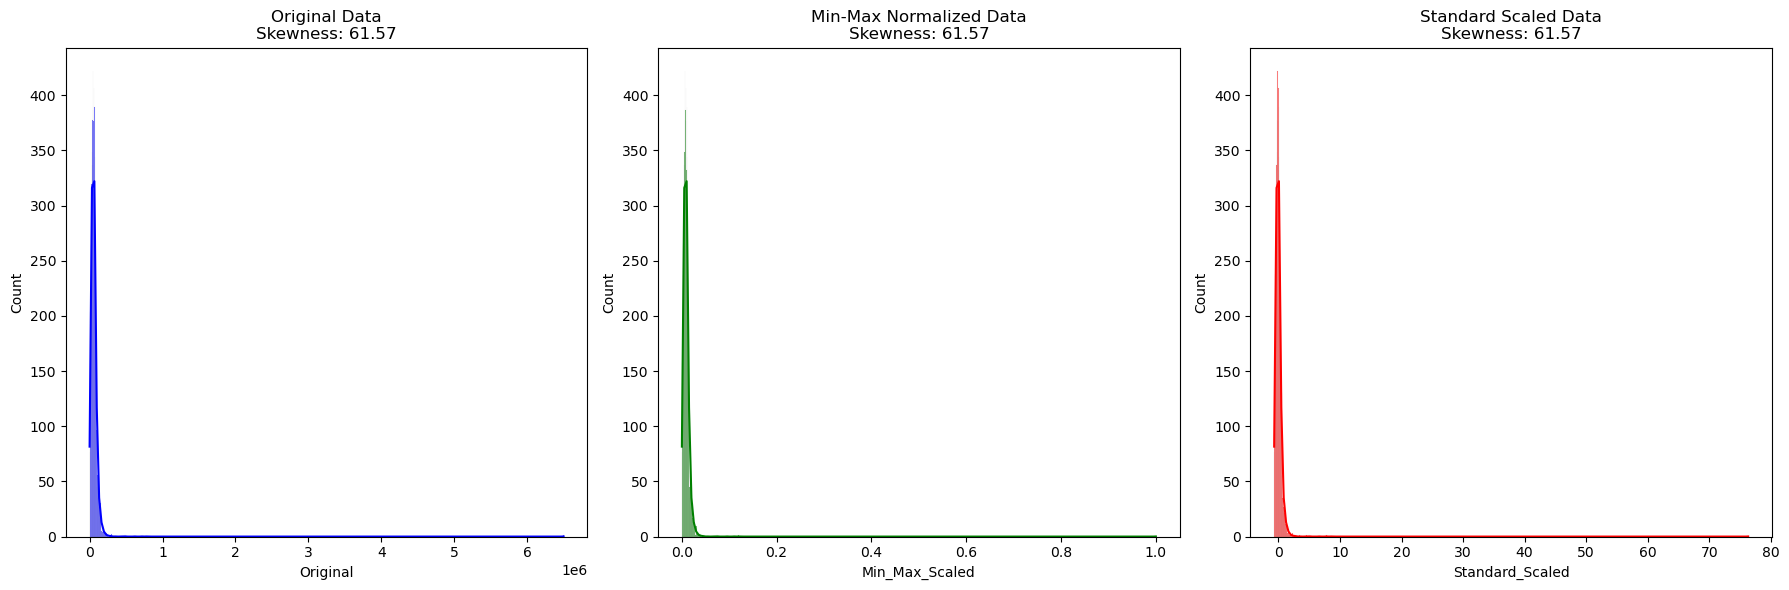

In [19]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['blue', 'green', 'red']
titles = ['Original Data', 'Min-Max Normalized Data', 'Standard Scaled Data']

for i, (col, color) in enumerate(zip(normalized_data.columns, colors)):
    sns.histplot(normalized_data[col], kde=True, ax=axes[i], color=color)
    axes[i].set_title(f'{titles[i]}\nSkewness: {skewness_values[i]:.2f}')

plt.tight_layout()
plt.show()
